# <b>Mini Project</b>

<b>Nama : Argya Falan Rifqi, Faizal Fauzi</b>

<b>NIM : 2212500686, 2212500900</b>

# Install Library

In [1]:
# install semua library yang diperlukan
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install Sastrawi
!pip install deep-translator
!pip install textblob

In [39]:
# untuk memanipulasi data pada DataFrame
import pandas as pd

# untuk operasi aritmatika
import numpy as np

# untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

#untuk cleaning data
import string
import re

# untuk stopword dan stemming
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# untuk translate data ke bahasa tertentu
from deep_translator import GoogleTranslator
import time

# untuk memberikan sentimen pada data berbahasa inggris
from textblob import TextBlob

from sklearn.model_selection import train_test_split        # untuk membagi data menjadi data latih (training) dan data uji (testing)
from sklearn.feature_extraction.text import TfidfVectorizer # untuk melakukan pembobotan pada tiap kata 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Crawl Data From Twitter (X)

In [3]:
#@title Twitter Auth Token
twitter_auth_token = '08b419d8d9ad4e71194791ae90190152f2c4f168' # change this auth token

# Crawl Data
filename = 'bbm_ethanol.csv'
search_keyword = 'campuran etanol since:2025-05-01 until:2025-11-30 lang:id'
limit = 1000

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


-- Scrolling... (1)
Filling in keywords: campuran etanol since:2025-05-01 until:2025-11-30 lang:id

 (2) (3) (4)

Your tweets saved to: C:\tugas\NLP\uts\mini project\tweets-data\bbm_ethanol.csv
Total tweets saved: 20

-- Scrolling... (1) (2)

Your tweets saved to: C:\tugas\NLP\uts\mini project\tweets-data\bbm_ethanol.csv
Total tweets saved: 40

-- Scrolling... (1)

Your tweets saved to: C:\tugas\NLP\uts\mini project\tweets-data\bbm_ethanol.csv
Total tweets saved: 60

-- Scrolling... (1) (2)

Your tweets saved to: C:\tugas\NLP\uts\mini project\tweets-data\bbm_ethanol.csv
Total tweets saved: 80

-- Scrolling

[v2.6.1] No more tweets found, please check your search criteria and csv file result
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@d7e721d5be8667e1498ab0e42134044a"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] TimeoutError: page.click: Timeout 60000ms exceeded.
Call log:
  - waiting for locator('text=Retry')



In [4]:
# Read the CSV file into a pandas DataFrame
scrape_result = pd.read_csv("tweets-data/bbm_ethanol.csv")

# Display the DataFrame
scrape_result

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1988604081385136353,Wed Nov 12 13:45:34 +0000 2025,5,BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...,1988604081385136353,NaN,NaN,in,NaN,0,0,3,https://x.com/undefined/status/198860408138513...,1484423320632438789,NaN
1,1988213944255926764,Wed Nov 12 12:46:13 +0000 2025,0,@ya2t_jakarta @toe_giman @IOytes Untuk menurun...,1988589147980976517,NaN,ya2t_jakarta,in,NaN,0,0,0,https://x.com/undefined/status/198858914798097...,1720665183188922368,NaN
2,1988548177293889795,Wed Nov 12 10:03:25 +0000 2025,4,Kementerian ESDM menargetkan penerapan bahan b...,1988548177293889795,https://pbs.twimg.com/media/G5i-BfRbYAAIxFd.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198854817729388...,23343960,NaN
3,1988547279716745715,Wed Nov 12 09:59:51 +0000 2025,0,Kementerian ESDM menargetkan penerapan bahan b...,1988547279716745715,https://pbs.twimg.com/media/G5i8_A0bMAAMTtJ.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198854727971674...,3042677100,NaN
4,1988536171132223861,Wed Nov 12 09:30:53 +0000 2025,0,@SeputarTetangga Kerja apa bu? Alhamdulilah la...,1988539988011606361,NaN,SeputarTetangga,in,NaN,0,0,0,https://x.com/undefined/status/198853998801160...,983012196606029824,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1975555069497254128,Tue Oct 07 23:38:27 +0000 2025,0,@febryan_pr @kompascom Ini nyata bukan hoax. P...,1975707321977479202,NaN,febryan_pr,in,NaN,0,0,0,https://x.com/undefined/status/197570732197747...,1720665183188922368,NaN
886,1975603973097988540,Tue Oct 07 23:34:36 +0000 2025,1,@Wynno15 @susipudjiastuti @grok @grok bagaiman...,1975706354481569893,NaN,Wynno15,in,NaN,0,2,0,https://x.com/undefined/status/197570635448156...,838962506508853248,NaN
887,1975555069497254128,Tue Oct 07 23:33:16 +0000 2025,1,@iezacz @kompascom Campuran etanol 10% (E10) d...,1975706019880968458,NaN,iezacz,in,NaN,0,0,0,https://x.com/undefined/status/197570601988096...,1720665183188922368,NaN
888,1975603973097988540,Tue Oct 07 23:31:54 +0000 2025,0,@cawapresinstan @susipudjiastuti Campuran etan...,1975705674450673834,NaN,cawapresinstan,in,NaN,0,0,0,https://x.com/undefined/status/197570567445067...,1720665183188922368,NaN


In [5]:
# Cek jumlah data yang didapatkan
num_tweets = len(scrape_result)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 890.


**Summary**: Melakukan scraping data dari twitter sebanyak 1000 data dengan keyword bbm campuran ethanol, lalu menyimpan hasil scraping dalam bentuk file .csv

# Load Dataset

In [6]:
df = pd.read_csv('tweets-data/bbm_ethanol.csv')
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1988604081385136353,Wed Nov 12 13:45:34 +0000 2025,5,BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...,1988604081385136353,NaN,NaN,in,NaN,0,0,3,https://x.com/undefined/status/198860408138513...,1484423320632438789,NaN
1,1988213944255926764,Wed Nov 12 12:46:13 +0000 2025,0,@ya2t_jakarta @toe_giman @IOytes Untuk menurun...,1988589147980976517,NaN,ya2t_jakarta,in,NaN,0,0,0,https://x.com/undefined/status/198858914798097...,1720665183188922368,NaN
2,1988548177293889795,Wed Nov 12 10:03:25 +0000 2025,4,Kementerian ESDM menargetkan penerapan bahan b...,1988548177293889795,https://pbs.twimg.com/media/G5i-BfRbYAAIxFd.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198854817729388...,23343960,NaN
3,1988547279716745715,Wed Nov 12 09:59:51 +0000 2025,0,Kementerian ESDM menargetkan penerapan bahan b...,1988547279716745715,https://pbs.twimg.com/media/G5i8_A0bMAAMTtJ.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198854727971674...,3042677100,NaN
4,1988536171132223861,Wed Nov 12 09:30:53 +0000 2025,0,@SeputarTetangga Kerja apa bu? Alhamdulilah la...,1988539988011606361,NaN,SeputarTetangga,in,NaN,0,0,0,https://x.com/undefined/status/198853998801160...,983012196606029824,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1975555069497254128,Tue Oct 07 23:38:27 +0000 2025,0,@febryan_pr @kompascom Ini nyata bukan hoax. P...,1975707321977479202,NaN,febryan_pr,in,NaN,0,0,0,https://x.com/undefined/status/197570732197747...,1720665183188922368,NaN
886,1975603973097988540,Tue Oct 07 23:34:36 +0000 2025,1,@Wynno15 @susipudjiastuti @grok @grok bagaiman...,1975706354481569893,NaN,Wynno15,in,NaN,0,2,0,https://x.com/undefined/status/197570635448156...,838962506508853248,NaN
887,1975555069497254128,Tue Oct 07 23:33:16 +0000 2025,1,@iezacz @kompascom Campuran etanol 10% (E10) d...,1975706019880968458,NaN,iezacz,in,NaN,0,0,0,https://x.com/undefined/status/197570601988096...,1720665183188922368,NaN
888,1975603973097988540,Tue Oct 07 23:31:54 +0000 2025,0,@cawapresinstan @susipudjiastuti Campuran etan...,1975705674450673834,NaN,cawapresinstan,in,NaN,0,0,0,https://x.com/undefined/status/197570567445067...,1720665183188922368,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      890 non-null    int64  
 1   created_at               890 non-null    object 
 2   favorite_count           890 non-null    int64  
 3   full_text                890 non-null    object 
 4   id_str                   890 non-null    int64  
 5   image_url                186 non-null    object 
 6   in_reply_to_screen_name  538 non-null    object 
 7   lang                     890 non-null    object 
 8   location                 0 non-null      float64
 9   quote_count              890 non-null    int64  
 10  reply_count              890 non-null    int64  
 11  retweet_count            890 non-null    int64  
 12  tweet_url                890 non-null    object 
 13  user_id_str              890 non-null    int64  
 14  username                 0

In [8]:
# filter kolom yang digunakan hanya full_text 
df = df.drop(columns=['conversation_id_str', 'created_at', 'favorite_count', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'location', 'username'])
df = df.rename(columns={'full_text': 'tweet_text'})
df

,tweet_text
0,BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...
1,@ya2t_jakarta @toe_giman @IOytes Untuk menurun...
2,Kementerian ESDM menargetkan penerapan bahan b...
3,Kementerian ESDM menargetkan penerapan bahan b...
4,@SeputarTetangga Kerja apa bu? Alhamdulilah la...
...,...
885,@febryan_pr @kompascom Ini nyata bukan hoax. P...
886,@Wynno15 @susipudjiastuti @grok @grok bagaiman...
887,@iezacz @kompascom Campuran etanol 10% (E10) d...
888,@cawapresinstan @susipudjiastuti Campuran etan...


In [9]:
df.isna().sum()

tweet_text    0
dtype: int64

# Text Preprocessing


## Case Folding

In [10]:
# Fungsi Case Folding dengan parameter text.lower()
def case_folding(text):
    return text.lower()

# Tampilkan hasil case folding
df['tweet_casefolding']= df['tweet_text'].apply(case_folding)
df

,tweet_text,tweet_casefolding
0,BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...,bensin etanol merusak mesin sebuah mercy 1982 ...
1,@ya2t_jakarta @toe_giman @IOytes Untuk menurun...,@ya2t_jakarta @toe_giman @ioytes untuk menurun...
2,Kementerian ESDM menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...
3,Kementerian ESDM menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...
4,@SeputarTetangga Kerja apa bu? Alhamdulilah la...,@seputartetangga kerja apa bu? alhamdulilah la...
...,...,...
885,@febryan_pr @kompascom Ini nyata bukan hoax. P...,@febryan_pr @kompascom ini nyata bukan hoax. p...
886,@Wynno15 @susipudjiastuti @grok @grok bagaiman...,@wynno15 @susipudjiastuti @grok @grok bagaiman...
887,@iezacz @kompascom Campuran etanol 10% (E10) d...,@iezacz @kompascom campuran etanol 10% (e10) d...
888,@cawapresinstan @susipudjiastuti Campuran etan...,@cawapresinstan @susipudjiastuti campuran etan...


## Remove Symbol

In [11]:
def remove_symbol(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Hapus URL
    text = re.sub(r"@\w+", ' ', text)                     # Hapus mention
    text = re.sub(r"#\w+", ' ', text)                     # Hapus hashtag
    text = re.sub(r"\d+", ' ', text)                      # Hapus angka
    text = re.sub(r"[^\w\s]", ' ', text)                  # Hapus tanda baca
    text = re.sub(r"\s+", ' ', text).strip()             # Hapus spasi berlebih
    text = re.sub(r"[^\x00-\x7F]+", ' ', text)             # Hapus emoji dan karakter non-ASCII
    return text

# Tampilkan hasil cleaning
df['tweet_cleaning']= df['tweet_casefolding'].apply(remove_symbol)
df

,tweet_text,tweet_casefolding,tweet_cleaning
0,BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...,bensin etanol merusak mesin sebuah mercy 1982 ...,bensin etanol merusak mesin sebuah mercy berta...
1,@ya2t_jakarta @toe_giman @IOytes Untuk menurun...,@ya2t_jakarta @toe_giman @ioytes untuk menurun...,untuk menurunkan oktan etanol yang blending va...
2,Kementerian ESDM menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...
3,Kementerian ESDM menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...
4,@SeputarTetangga Kerja apa bu? Alhamdulilah la...,@seputartetangga kerja apa bu? alhamdulilah la...,kerja apa bu alhamdulilah lagi laris kak jual ...
...,...,...,...
885,@febryan_pr @kompascom Ini nyata bukan hoax. P...,@febryan_pr @kompascom ini nyata bukan hoax. p...,ini nyata bukan hoax pemerintah indonesia bere...
886,@Wynno15 @susipudjiastuti @grok @grok bagaiman...,@wynno15 @susipudjiastuti @grok @grok bagaiman...,bagaimana jika etanol di buat campuran kumur t...
887,@iezacz @kompascom Campuran etanol 10% (E10) d...,@iezacz @kompascom campuran etanol 10% (e10) d...,campuran etanol e di bbm bisa tingkatkan oktan...
888,@cawapresinstan @susipudjiastuti Campuran etan...,@cawapresinstan @susipudjiastuti campuran etan...,campuran etanol e di bensin umumnya aman untuk...


## Normalize Word 

In [12]:
# Fungsi untuk menormalisasi kata gaul dan tidak baku menjadi kata baku

# Membaca kamus slangword
data = pd.read_excel('kamus_slangword.xlsx')
slang_dict = dict(zip(data['tidak_baku'], data['baku']))

def normalisasi_slangword(text):
    words = text.split()
    normalized_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Terapkan fungsi ke kolom teks_bersih
df['tweet_normalisasi'] = df['tweet_cleaning'].apply(lambda x: normalisasi_slangword(x))
df

,tweet_text,tweet_casefolding,tweet_cleaning,tweet_normalisasi
0,BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...,bensin etanol merusak mesin sebuah mercy 1982 ...,bensin etanol merusak mesin sebuah mercy berta...,bensin etanol merusak mesin sebuah mercy berta...
1,@ya2t_jakarta @toe_giman @IOytes Untuk menurun...,@ya2t_jakarta @toe_giman @ioytes untuk menurun...,untuk menurunkan oktan etanol yang blending va...,untuk menurunkan oktan etanol yang blending va...
2,Kementerian ESDM menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...
3,Kementerian ESDM menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...
4,@SeputarTetangga Kerja apa bu? Alhamdulilah la...,@seputartetangga kerja apa bu? alhamdulilah la...,kerja apa bu alhamdulilah lagi laris kak jual ...,kerja apa bu alhamdulillah lagi laris kakak ju...
...,...,...,...,...
885,@febryan_pr @kompascom Ini nyata bukan hoax. P...,@febryan_pr @kompascom ini nyata bukan hoax. p...,ini nyata bukan hoax pemerintah indonesia bere...,ini nyata bukan hoax pemerintah indonesia bere...
886,@Wynno15 @susipudjiastuti @grok @grok bagaiman...,@wynno15 @susipudjiastuti @grok @grok bagaiman...,bagaimana jika etanol di buat campuran kumur t...,bagaimana jika etanol di buat campuran kumur t...
887,@iezacz @kompascom Campuran etanol 10% (E10) d...,@iezacz @kompascom campuran etanol 10% (e10) d...,campuran etanol e di bbm bisa tingkatkan oktan...,campuran etanol e di bbm bisa tingkatkan oktan...
888,@cawapresinstan @susipudjiastuti Campuran etan...,@cawapresinstan @susipudjiastuti campuran etan...,campuran etanol e di bensin umumnya aman untuk...,campuran etanol e di bensin umumnya aman untuk...


## Tokenisasi 

In [13]:
# Fungsi tokenisasi teks
def tokenisasi_teks(text):
    if isinstance(text, str):
        # Tokenisasi dengan regex, pecah kalimat menjadi per token / kata
        return re.findall(r'\b\w+\b', text)
    return []

df['tweet_tokenize'] = df['tweet_normalisasi'].apply(tokenisasi_teks)
df

,tweet_text,tweet_casefolding,tweet_cleaning,tweet_normalisasi,tweet_tokenize
0,BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...,bensin etanol merusak mesin sebuah mercy 1982 ...,bensin etanol merusak mesin sebuah mercy berta...,bensin etanol merusak mesin sebuah mercy berta...,"[bensin, etanol, merusak, mesin, sebuah, mercy..."
1,@ya2t_jakarta @toe_giman @IOytes Untuk menurun...,@ya2t_jakarta @toe_giman @ioytes untuk menurun...,untuk menurunkan oktan etanol yang blending va...,untuk menurunkan oktan etanol yang blending va...,"[untuk, menurunkan, oktan, etanol, yang, blend..."
2,Kementerian ESDM menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,"[kementerian, esdm, menargetkan, penerapan, ba..."
3,Kementerian ESDM menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,"[kementerian, esdm, menargetkan, penerapan, ba..."
4,@SeputarTetangga Kerja apa bu? Alhamdulilah la...,@seputartetangga kerja apa bu? alhamdulilah la...,kerja apa bu alhamdulilah lagi laris kak jual ...,kerja apa bu alhamdulillah lagi laris kakak ju...,"[kerja, apa, bu, alhamdulillah, lagi, laris, k..."
...,...,...,...,...,...
885,@febryan_pr @kompascom Ini nyata bukan hoax. P...,@febryan_pr @kompascom ini nyata bukan hoax. p...,ini nyata bukan hoax pemerintah indonesia bere...,ini nyata bukan hoax pemerintah indonesia bere...,"[ini, nyata, bukan, hoax, pemerintah, indonesi..."
886,@Wynno15 @susipudjiastuti @grok @grok bagaiman...,@wynno15 @susipudjiastuti @grok @grok bagaiman...,bagaimana jika etanol di buat campuran kumur t...,bagaimana jika etanol di buat campuran kumur t...,"[bagaimana, jika, etanol, di, buat, campuran, ..."
887,@iezacz @kompascom Campuran etanol 10% (E10) d...,@iezacz @kompascom campuran etanol 10% (e10) d...,campuran etanol e di bbm bisa tingkatkan oktan...,campuran etanol e di bbm bisa tingkatkan oktan...,"[campuran, etanol, e, di, bbm, bisa, tingkatka..."
888,@cawapresinstan @susipudjiastuti Campuran etan...,@cawapresinstan @susipudjiastuti campuran etan...,campuran etanol e di bensin umumnya aman untuk...,campuran etanol e di bensin umumnya aman untuk...,"[campuran, etanol, e, di, bensin, umumnya, ama..."


## Stopword

In [14]:
# Inisialisasi stopword Sastrawi
factory = StopWordRemoverFactory()
stop_words = set(factory.get_stop_words())

# Fungsi hapus stopword (menggunakan hasil tokenisasi)
def stopword_teks(token):
    if isinstance(token, list):
        filtered = [word for word in token if word not in stop_words]
        return ' '.join(filtered)
    return ''

df['tweet_stopword'] = df['tweet_tokenize'].apply(stopword_teks)
df

,tweet_text,tweet_casefolding,tweet_cleaning,tweet_normalisasi,tweet_tokenize,tweet_stopword
0,BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...,bensin etanol merusak mesin sebuah mercy 1982 ...,bensin etanol merusak mesin sebuah mercy berta...,bensin etanol merusak mesin sebuah mercy berta...,"[bensin, etanol, merusak, mesin, sebuah, mercy...",bensin etanol merusak mesin sebuah mercy berta...
1,@ya2t_jakarta @toe_giman @IOytes Untuk menurun...,@ya2t_jakarta @toe_giman @ioytes untuk menurun...,untuk menurunkan oktan etanol yang blending va...,untuk menurunkan oktan etanol yang blending va...,"[untuk, menurunkan, oktan, etanol, yang, blend...",menurunkan oktan etanol blending value menjadi...
2,Kementerian ESDM menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,"[kementerian, esdm, menargetkan, penerapan, ba...",kementerian esdm menargetkan penerapan bahan b...
3,Kementerian ESDM menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,"[kementerian, esdm, menargetkan, penerapan, ba...",kementerian esdm menargetkan penerapan bahan b...
4,@SeputarTetangga Kerja apa bu? Alhamdulilah la...,@seputartetangga kerja apa bu? alhamdulilah la...,kerja apa bu alhamdulilah lagi laris kak jual ...,kerja apa bu alhamdulillah lagi laris kakak ju...,"[kerja, apa, bu, alhamdulillah, lagi, laris, k...",kerja apa bu alhamdulillah laris kakak jual be...
...,...,...,...,...,...,...
885,@febryan_pr @kompascom Ini nyata bukan hoax. P...,@febryan_pr @kompascom ini nyata bukan hoax. p...,ini nyata bukan hoax pemerintah indonesia bere...,ini nyata bukan hoax pemerintah indonesia bere...,"[ini, nyata, bukan, hoax, pemerintah, indonesi...",nyata bukan hoax pemerintah indonesia berencan...
886,@Wynno15 @susipudjiastuti @grok @grok bagaiman...,@wynno15 @susipudjiastuti @grok @grok bagaiman...,bagaimana jika etanol di buat campuran kumur t...,bagaimana jika etanol di buat campuran kumur t...,"[bagaimana, jika, etanol, di, buat, campuran, ...",bagaimana etanol buat campuran kumur terus dim...
887,@iezacz @kompascom Campuran etanol 10% (E10) d...,@iezacz @kompascom campuran etanol 10% (e10) d...,campuran etanol e di bbm bisa tingkatkan oktan...,campuran etanol e di bbm bisa tingkatkan oktan...,"[campuran, etanol, e, di, bbm, bisa, tingkatka...",campuran etanol e bbm bisa tingkatkan oktan ku...
888,@cawapresinstan @susipudjiastuti Campuran etan...,@cawapresinstan @susipudjiastuti campuran etan...,campuran etanol e di bensin umumnya aman untuk...,campuran etanol e di bensin umumnya aman untuk...,"[campuran, etanol, e, di, bensin, umumnya, ama...",campuran etanol e bensin umumnya aman mesin mo...


## Stemming

In [15]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming menggunakan Sastrawi
def stem_text(text):
    if isinstance(text, str):
        return stemmer.stem(text)
    return ''
df['tweet_stemming'] = df['tweet_stopword'].apply(stem_text)
df

,tweet_text,tweet_casefolding,tweet_cleaning,tweet_normalisasi,tweet_tokenize,tweet_stopword,tweet_stemming
0,BENSIN ETANOL MERUSAK MESIN Sebuah Mercy 1982 ...,bensin etanol merusak mesin sebuah mercy 1982 ...,bensin etanol merusak mesin sebuah mercy berta...,bensin etanol merusak mesin sebuah mercy berta...,"[bensin, etanol, merusak, mesin, sebuah, mercy...",bensin etanol merusak mesin sebuah mercy berta...,bensin etanol rusak mesin buah mercy tahan tah...
1,@ya2t_jakarta @toe_giman @IOytes Untuk menurun...,@ya2t_jakarta @toe_giman @ioytes untuk menurun...,untuk menurunkan oktan etanol yang blending va...,untuk menurunkan oktan etanol yang blending va...,"[untuk, menurunkan, oktan, etanol, yang, blend...",menurunkan oktan etanol blending value menjadi...,turun oktan etanol blending value jadi campur ...
2,Kementerian ESDM menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,"[kementerian, esdm, menargetkan, penerapan, ba...",kementerian esdm menargetkan penerapan bahan b...,menteri esdm target terap bahan bakar campur e...
3,Kementerian ESDM menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,kementerian esdm menargetkan penerapan bahan b...,"[kementerian, esdm, menargetkan, penerapan, ba...",kementerian esdm menargetkan penerapan bahan b...,menteri esdm target terap bahan bakar campur e...
4,@SeputarTetangga Kerja apa bu? Alhamdulilah la...,@seputartetangga kerja apa bu? alhamdulilah la...,kerja apa bu alhamdulilah lagi laris kak jual ...,kerja apa bu alhamdulillah lagi laris kakak ju...,"[kerja, apa, bu, alhamdulillah, lagi, laris, k...",kerja apa bu alhamdulillah laris kakak jual be...,kerja apa bu alhamdulillah laris kakak jual be...
...,...,...,...,...,...,...,...
885,@febryan_pr @kompascom Ini nyata bukan hoax. P...,@febryan_pr @kompascom ini nyata bukan hoax. p...,ini nyata bukan hoax pemerintah indonesia bere...,ini nyata bukan hoax pemerintah indonesia bere...,"[ini, nyata, bukan, hoax, pemerintah, indonesi...",nyata bukan hoax pemerintah indonesia berencan...,nyata bukan hoax perintah indonesia rencana wa...
886,@Wynno15 @susipudjiastuti @grok @grok bagaiman...,@wynno15 @susipudjiastuti @grok @grok bagaiman...,bagaimana jika etanol di buat campuran kumur t...,bagaimana jika etanol di buat campuran kumur t...,"[bagaimana, jika, etanol, di, buat, campuran, ...",bagaimana etanol buat campuran kumur terus dim...,bagaimana etanol buat campur kumur terus minum...
887,@iezacz @kompascom Campuran etanol 10% (E10) d...,@iezacz @kompascom campuran etanol 10% (e10) d...,campuran etanol e di bbm bisa tingkatkan oktan...,campuran etanol e di bbm bisa tingkatkan oktan...,"[campuran, etanol, e, di, bbm, bisa, tingkatka...",campuran etanol e bbm bisa tingkatkan oktan ku...,campur etanol e bbm bisa tingkat oktan kurang ...
888,@cawapresinstan @susipudjiastuti Campuran etan...,@cawapresinstan @susipudjiastuti campuran etan...,campuran etanol e di bensin umumnya aman untuk...,campuran etanol e di bensin umumnya aman untuk...,"[campuran, etanol, e, di, bensin, umumnya, ama...",campuran etanol e bensin umumnya aman mesin mo...,campur etanol e bensin umum aman mesin modern ...


In [16]:
# Simpan hasil tahapan preprocessing dalam file csv
df.to_csv('bbmethanol_preprocessing.csv', index=False)

In [17]:
# Hapus baris dengan nilai kosong atau string kosong 
df_bersih = df[df['tweet_stemming'].notna()]                 # Hapus NaN / nilai kosong
df_bersih = df_bersih[df_bersih['tweet_stemming'].str.strip() != '']  # Hapus string kosong

# Simpan ulasan yang sudah bersih
df_bersih[['tweet_stemming']].rename(columns={'tweet_stemming': 'clean_tweet'}).to_csv('bbmethanol_clean.csv', index=False)

# Pelabelan Sentimen Textblob

In [18]:
# cek jika masih ada nilai kosong pada tweet
df = pd.read_csv('bbmethanol_clean.csv')
df.isnull().sum()

clean_tweet    0
dtype: int64

In [19]:
# Menghapus nilai kosong atau NaN pada dataset
df = df.dropna(subset=['clean_tweet'])

In [20]:
# Translate data sebelum dilakukan pelabelan. library TextBlob hanya bisa memberikan sentimen terhadap data berbahasa inggris
def translate_inggris(kalimat):
     try:
          time.sleep(0.1)  # jeda untuk mencegah rate limit
          terjemahan = GoogleTranslator(source='id', target='en').translate(kalimat)
          return terjemahan.lower()
     except Exception as e:
        # Tampilkan kalimat yang gagal dan lanjutkan
        print(f"[Gagal menerjemahkan kalimat]: {kalimat}\n[error]: {e}")
        return kalimat

df['tweet_translated'] = df['clean_tweet'].apply(translate_inggris)
df

,clean_tweet,tweet_translated
0,bensin etanol rusak mesin buah mercy tahan tah...,ethanol petrol damaged engine fruit mercy last...
1,turun oktan etanol blending value jadi campur ...,lower octane ethanol blending value so mix fue...
2,menteri esdm target terap bahan bakar campur e...,minister of energy and mineral resources targe...
3,menteri esdm target terap bahan bakar campur e...,minister of energy and mineral resources targe...
4,kerja apa bu alhamdulillah laris kakak jual be...,"what do you do ma'am, thank god it's selling w..."
...,...,...
885,nyata bukan hoax perintah indonesia rencana wa...,"it's real, not a hoax, indonesia's order plans..."
886,bagaimana etanol buat campur kumur terus minum...,how can you use ethanol to gargle and drink th...
887,campur etanol e bbm bisa tingkat oktan kurang ...,mixing ethanol and fuel can reduce octane leve...
888,campur etanol e bensin umum aman mesin modern ...,"mix ethanol and general gasoline, safe modern ..."


In [21]:
# Proses Pelabelan sentimen menggunakan TextBlob

def pelabelan_sentimen(kalimat_inggris):
    blob = TextBlob(kalimat_inggris)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentimen = "positive"
    elif polarity == 0:
        sentimen = "neutral"
    else: 
        sentimen = "negative"
    return pd.Series([polarity, sentimen])

# df['label'] = df['ulasan_inggris'].apply(pelabelan_sentimen)
df[['polarity','sentimen']] = df['tweet_translated'].apply(pelabelan_sentimen)
df[['clean_tweet', 'tweet_translated','polarity', 'sentimen']].to_csv('labeled_tweet.csv', index=False)


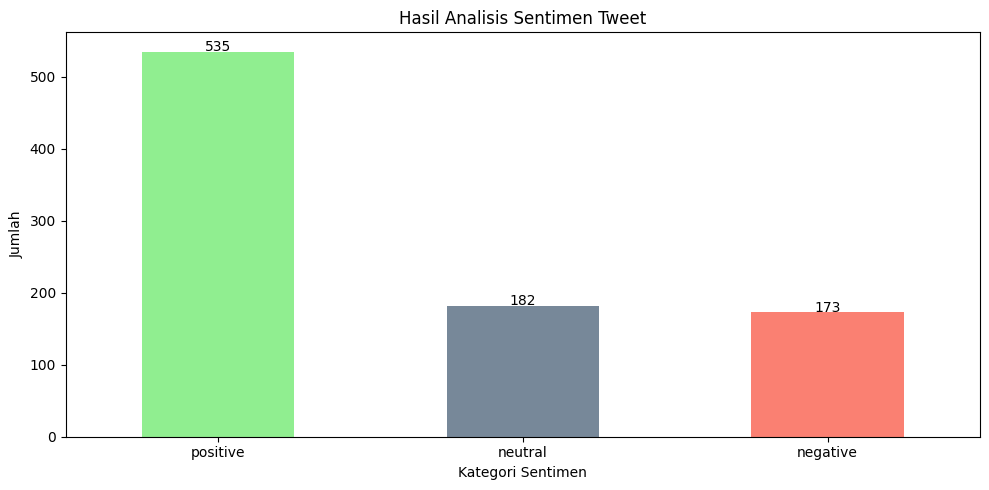

In [22]:
# Visualisasi hasil pelabelan
df = pd.read_csv('labeled_tweet.csv')
hitung_sentimen = df['sentimen'].value_counts()

# Buat bar chart
plt.figure(figsize=(10, 5))
hitung_sentimen.plot(kind='bar', color=['lightgreen', 'lightslategray', 'salmon'])

# Memberikan judul bar
plt.title('Hasil Analisis Sentimen Tweet')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

for i, v in enumerate(hitung_sentimen):
    plt.text(i, v + 0.5, str(v), ha='center')

# Tampilkan grafik
plt.tight_layout()
plt.show()

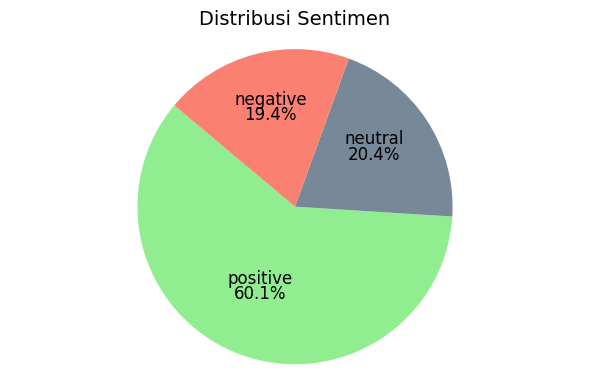

In [23]:
# Visualisasi distribusi hasil pelabelan
df = pd.read_csv('labeled_tweet.csv')
hitung_sentimen = df['sentimen'].value_counts()

# Buat bar chart
plt.figure(figsize=(6, 4))
colors = ['lightgreen', 'lightslategray', 'salmon']
wedges, texts, autotexts = plt.pie(
    hitung_sentimen,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# Tambahkan label kategori di atas angka persentase
for i, (wedge, label) in enumerate(zip(wedges, hitung_sentimen.index)):
    theta = (wedge.theta2 + wedge.theta1) / 2.0  # sudut tengah irisan
    x = 0.6 * np.cos(np.deg2rad(theta))
    y = 0.6 * np.sin(np.deg2rad(theta))
    
    # Geser label ke atas sedikit dari persentase
    plt.text(x, y + 0.1, label, ha='center', va='center', fontsize=12)

# Tampilkan grafik
plt.title('Distribusi Sentimen', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Pembagian Data

In [26]:
# Pembagian data 80% data latih, 20% data uji
# X_train = ulasan_bersih pada data latih, X_test = ulasan_bersih pada data uji, y_train = label pada data latih, y_test = label pada data uji
X_train, X_test, y_train, y_test = train_test_split(df['clean_tweet'], df['sentimen'], test_size=0.2, shuffle=False)

# Mengekspor data latih dan data uji
data_latih = pd.DataFrame({'clean_tweet': X_train, 'sentimen': y_train})
data_uji = pd.DataFrame({'clean_tweet': X_test, 'sentimen': y_test})
# Ekspor sample data latih dan data uji
data_latih.to_csv('data_latih.csv', index=False)
data_uji.to_csv('data_uji.csv', index=False)

In [27]:
datalatih = pd.read_csv('data_latih.csv')
datalatih.head(20)

,clean_tweet,sentimen
0,bensin etanol rusak mesin buah mercy tahan tah...,positive
1,turun oktan etanol blending value jadi campur ...,negative
2,menteri esdm target terap bahan bakar campur e...,positive
3,menteri esdm target terap bahan bakar campur e...,positive
4,kerja apa bu alhamdulillah laris kakak jual be...,positive
5,toyota motor corp rencana tanam investasi nila...,positive
6,bahlil jahanam bbm campur etanol kau legal emi...,positive
7,bijak mandatori e memang bisa jadi langkah hij...,positive
8,biosolar mesin biodiesel kalau diesel bbm orga...,positive
9,campur etanol memang diujicoba,neutral


In [29]:
# Menampilkan jumlah masing-masing label data latih
print(datalatih['sentimen'].value_counts())

sentimen
positive    428
neutral     144
negative    140
Name: count, dtype: int64


In [30]:
datauji = pd.read_csv('data_uji.csv')
datauji.head(20)

,clean_tweet,sentimen
0,seperti kandung etanol bbm bukan baru deh just...,positive
1,rencana perintah tambah kadar etanol bahan bak...,neutral
2,bahlil sebut prabowo tuju campur etanol bbm,neutral
3,bahlil mau wajib campur etanol bbm,positive
4,dapat benar produksi etanol indonesia memang m...,negative
5,jelas metode campur bensin etanol bisa larut a...,positive
6,dasar data baru shell indonesia tidak jual ben...,negative
7,bbm impor beli kandung etanol kalau tidak biki...,negative
8,kritik oposisi warga as campur etanol e bbm ut...,positive
9,campur etanol bensin e punya dampak positif ne...,positive


In [31]:
# Menampilkan jumlah masing-masing label data uji
print(datauji['sentimen'].value_counts())

sentimen
positive    107
neutral      38
negative     33
Name: count, dtype: int64


# Ekstraksi Fitur (TF-IDF)

In [32]:
tfidf_vectorizer = TfidfVectorizer(norm=None, smooth_idf=True, max_features=5000)
X_train_vector = tfidf_vectorizer.fit_transform(X_train)
X_test_vector = tfidf_vectorizer.transform(X_test)
terms = tfidf_vectorizer.get_feature_names_out() # Ambil daftar kata/fitur dari tfidf vectorizer
idf_values = tfidf_vectorizer.idf_
df_values = np.bincount(X_train_vector.indices, minlength=len(terms))

# Buat urutan kata sesuai kemunculan di dokumen U1 sampai  U(n)
ordered_terms = []
seen = set()
for doc in X_train:
    for word in doc.split():
        word = word.lower()
        if word in terms and word not in seen:
            ordered_terms.append(word)
            seen.add(word)

for term in terms:
    if term not in seen:
        ordered_terms.append(term)

# Buat DataFrame hasil IDF
idf_df = pd.DataFrame({'term': terms, 'df': df_values, 'idf': idf_values})
idf_df = idf_df.set_index('term').loc[ordered_terms].reset_index() # Urutkan df, IDF berdasarkan urutan kemunculan kata pada dokumen
idf_df.to_csv('hasil_idf.csv', index=False)  # Simpan hasil idf ke CSV

# Buat DataFrame TF-IDF dengan baris = term, kolom = dokumen
dokumen = [f"U{i+1}" for i in range(X_train_vector.shape[0])]
tfidf_df = pd.DataFrame(X_train_vector.toarray().T, index=terms, columns=dokumen)
tfidf_df = tfidf_df.loc[ordered_terms].reset_index() # Urutkan baris (index) berdasarkan urutan kemunculan kata
tfidf_df.rename(columns={'index': 'term'}, inplace=True)
tfidf_df.to_csv("hasil_tfidf.csv", index=False) # Simpan hasil tfidf ke CSV


# Algoritma LDA

In [34]:
# Proses pelatihan model LDA
model = LinearDiscriminantAnalysis()
model.fit(X_train_vector.toarray(), y_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


# Evaluasi Confusion Matrix

In [37]:
# --- 6. Evaluasi Model ---
y_pred = model.predict(X_test_vector.toarray())
print("\n=== LDA Classification Report ===")
print(classification_report(y_test, y_pred))


=== LDA Classification Report ===
              precision    recall  f1-score   support

    negative       0.34      0.30      0.32        33
     neutral       0.34      0.50      0.40        38
    positive       0.65      0.56      0.60       107

    accuracy                           0.50       178
   macro avg       0.44      0.45      0.44       178
weighted avg       0.52      0.50      0.51       178



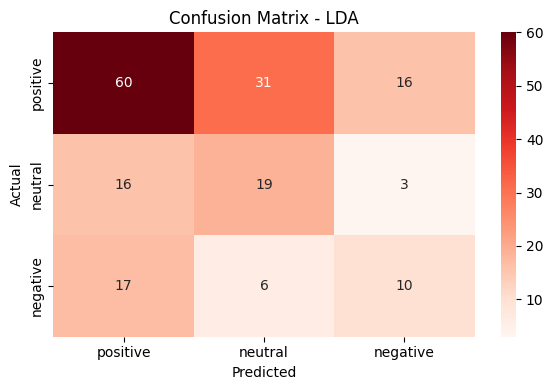

In [40]:
# label pada confusion matrix
label = ['positive', 'neutral', 'negative']
y_pred = model.predict(X_test_vector)
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=label)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=label, yticklabels=label)

# Label dan judul
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LDA')
plt.tight_layout()
plt.show()


# Visualisasi Wordcloud

## Wordcloud Positive

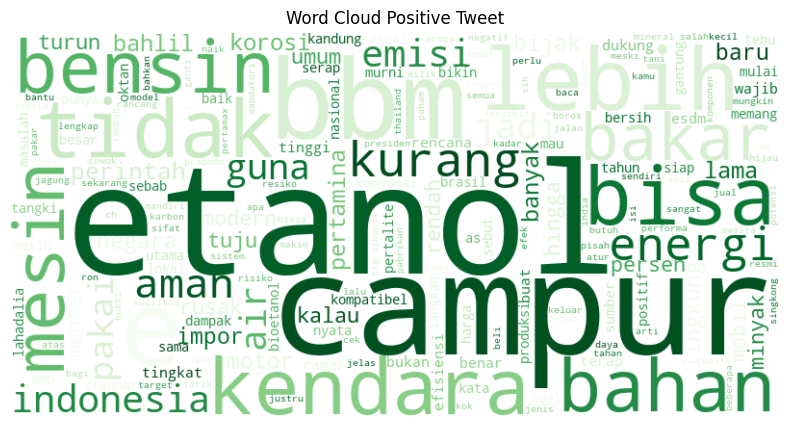

In [41]:
data = pd.read_csv('labeled_tweet.csv')
positif = data[data['sentimen'] == 'positive']  
text = ' '.join(positif['clean_tweet'].astype(str))
word_freq = Counter(text.split())


wordcloud = WordCloud(
    max_font_size=160,
    width = 800,
    height = 400,
    background_color="white",
    colormap="Greens"
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Positive Tweet")
plt.show()

## Wordcloud Neutral

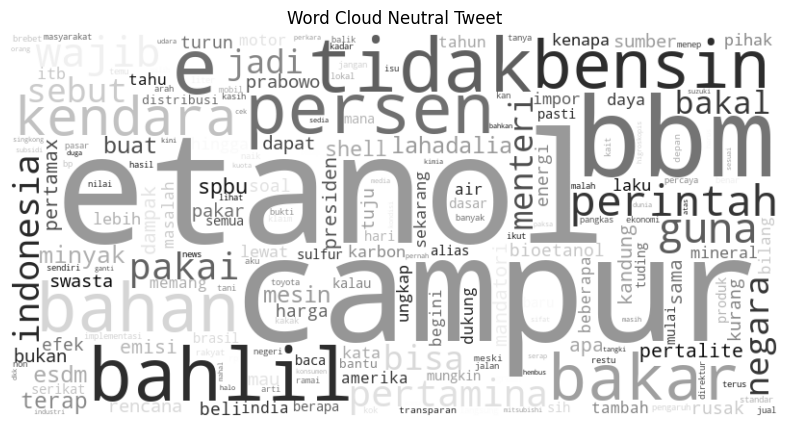

In [42]:
data = pd.read_csv('labeled_tweet.csv')
neutral = data[data['sentimen'] == 'neutral']  
text = ' '.join(neutral['clean_tweet'].astype(str))
word_freq = Counter(text.split())


wordcloud = WordCloud(
    max_font_size=160,
    width = 800,
    height = 400,
    background_color="white",
    colormap="gist_yerg"
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Neutral Tweet")
plt.show()

## Wordcloud Negative

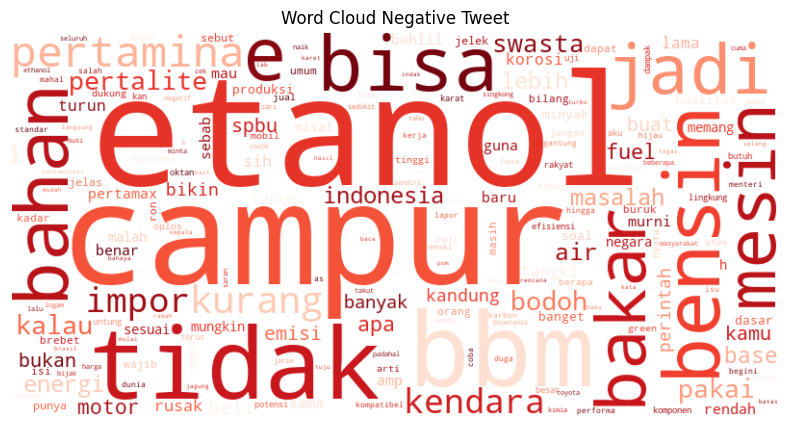

In [43]:
data = pd.read_csv('labeled_tweet.csv')
negative = data[data['sentimen'] == 'negative']  
text = ' '.join(negative['clean_tweet'].astype(str))
word_freq = Counter(text.split())

wordcloud = WordCloud(
    max_font_size=160,
    width = 800,
    height = 400,
    background_color="white",
    colormap="Reds"
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Negative Tweet")
plt.show()